# Projet Data

Visualization

In [2]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Sélectionner les données nécessaires dans la base de données

In [60]:
df = pd.read_excel("webscraping.xlsx", usecols=["Latitude", "Longitude", "Adults", "Children"])
df.head()

,Adults,Children,Latitude,Longitude
0,5.0,3.0,50.549776,5.324099
1,8.0,0.0,50.489398,5.096547
2,7.0,5.0,50.481662,5.522526
3,6.0,2.0,49.683460,5.816771
4,6.0,2.0,49.683460,5.816771


Combinez le diagramme de dispersion avec les Geopandas

In [61]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Adults,Children,Latitude,Longitude,geometry
0,5.0,3.0,50.549776,5.324099,POINT (5.32410 50.54978)
1,8.0,0.0,50.489398,5.096547,POINT (5.09655 50.48940)
2,7.0,5.0,50.481662,5.522526,POINT (5.52253 50.48166)
3,6.0,2.0,49.683460,5.816771,POINT (5.81677 49.68346)
4,6.0,2.0,49.683460,5.816771,POINT (5.81677 49.68346)


Combiner les infos avec la carte

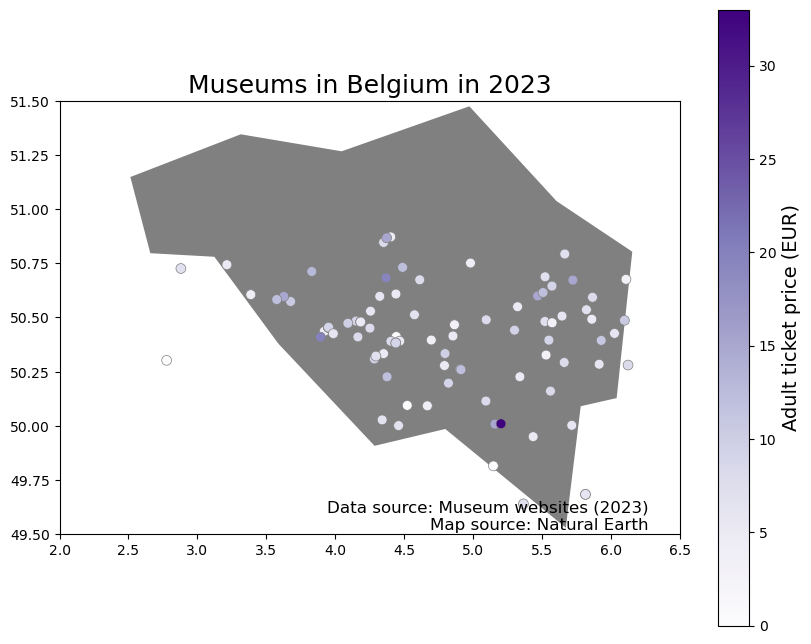

In [69]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Purples"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Adults"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Adult ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

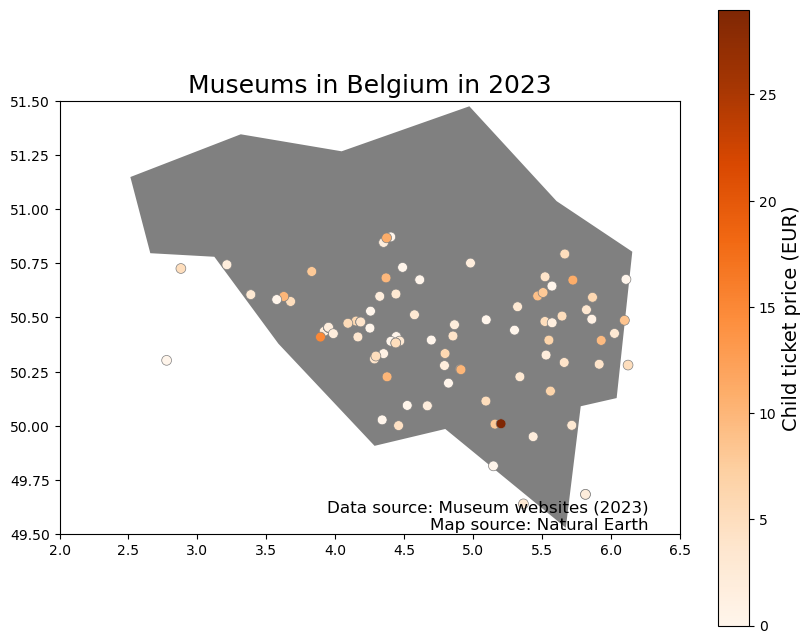

In [68]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Oranges"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Children"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Child ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

In [1]:
pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium

In [3]:
import folium

# Create a map of Belgium
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

# Show the map
belgium_map

In [4]:
import pandas as pd
import folium

# Read the excel file into a pandas dataframe
df = pd.read_excel('webscraping.xlsx')

# Create the map centered on Belgium
map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

# Loop through the rows of the dataframe and add markers for each observation
for index, row in df.iterrows():
    lat = row['Latitude']  # assuming the column name for latitude is 'latitude'
    lon = row['Longitude']  # assuming the column name for longitude is 'longitude'
    marker = folium.Marker(location=[lat, lon])
    marker.add_to(map)

# Display the map
map